# Capstone - Initial EDA

Some EDA will be completed, using the previously cleaned London Airbnb dataset.

In [2]:
# imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import cleaned dataset:
airbnb_ldn = pd.read_csv('airbnb_ldn_final.csv')

In [4]:
airbnb_ldn.shape

(32686, 39)

In [5]:
# drop 'Unnamed', column added due to additional index column being added with the import of the cleaned data:
airbnb_ldn.drop(columns = 'Unnamed: 0', inplace=True)

In [6]:
airbnb_ldn.columns

Index(['Listing Title', 'Property Type', 'Listing Type', 'City', 'Zipcode',
       'Number of Reviews', 'Bedrooms', 'Bathrooms', 'Max Guests',
       'Airbnb Superhost', 'Cancellation Policy', 'Cleaning Fee (Native)',
       'Extra People Fee(Native)', 'Check-in Time', 'Checkout Time',
       'Minimum Stay', 'Latitude', 'Longitude', 'Overall Rating',
       'Airbnb Communication Rating', 'Airbnb Accuracy Rating',
       'Airbnb Cleanliness Rating', 'Airbnb Checkin Rating',
       'Airbnb Location Rating', 'Airbnb Value Rating', 'Amenities',
       'Airbnb Host ID', 'Host Listing Count', 'guest_controls',
       'Pets Allowed', 'Count Available Days LTM', 'Count Blocked Days LTM',
       'Count Reservation Days LTM', 'Occupancy Rate LTM',
       'Number of Bookings LTM',
       'Number of Bookings LTM - Number of observed month',
       'Average Daily Rate (Native)', 'Annual Revenue LTM (Native)'],
      dtype='object')

## Column Correlations

During the cleaning stage, several columns that were deemed redundant were dropped. Columns meaning must be explored further, correlations between the various numerical columns will be found, to determine if any columns are semantically the same. All individual variable columns must be independent of each other (have low correlations), otherwise future models can be negatively effected.

The columns will be split between numerical, categorical and target variables:

In [108]:
# split the dataframe into numerical columns, categorical columns and the target column:
X_num_cols = (airbnb_ldn.select_dtypes(exclude='object')).drop(columns='Annual Revenue LTM (Native)')
X_cat_cols = airbnb_ldn.select_dtypes(include='object')
y = airbnb_ldn['Annual Revenue LTM (Native)']

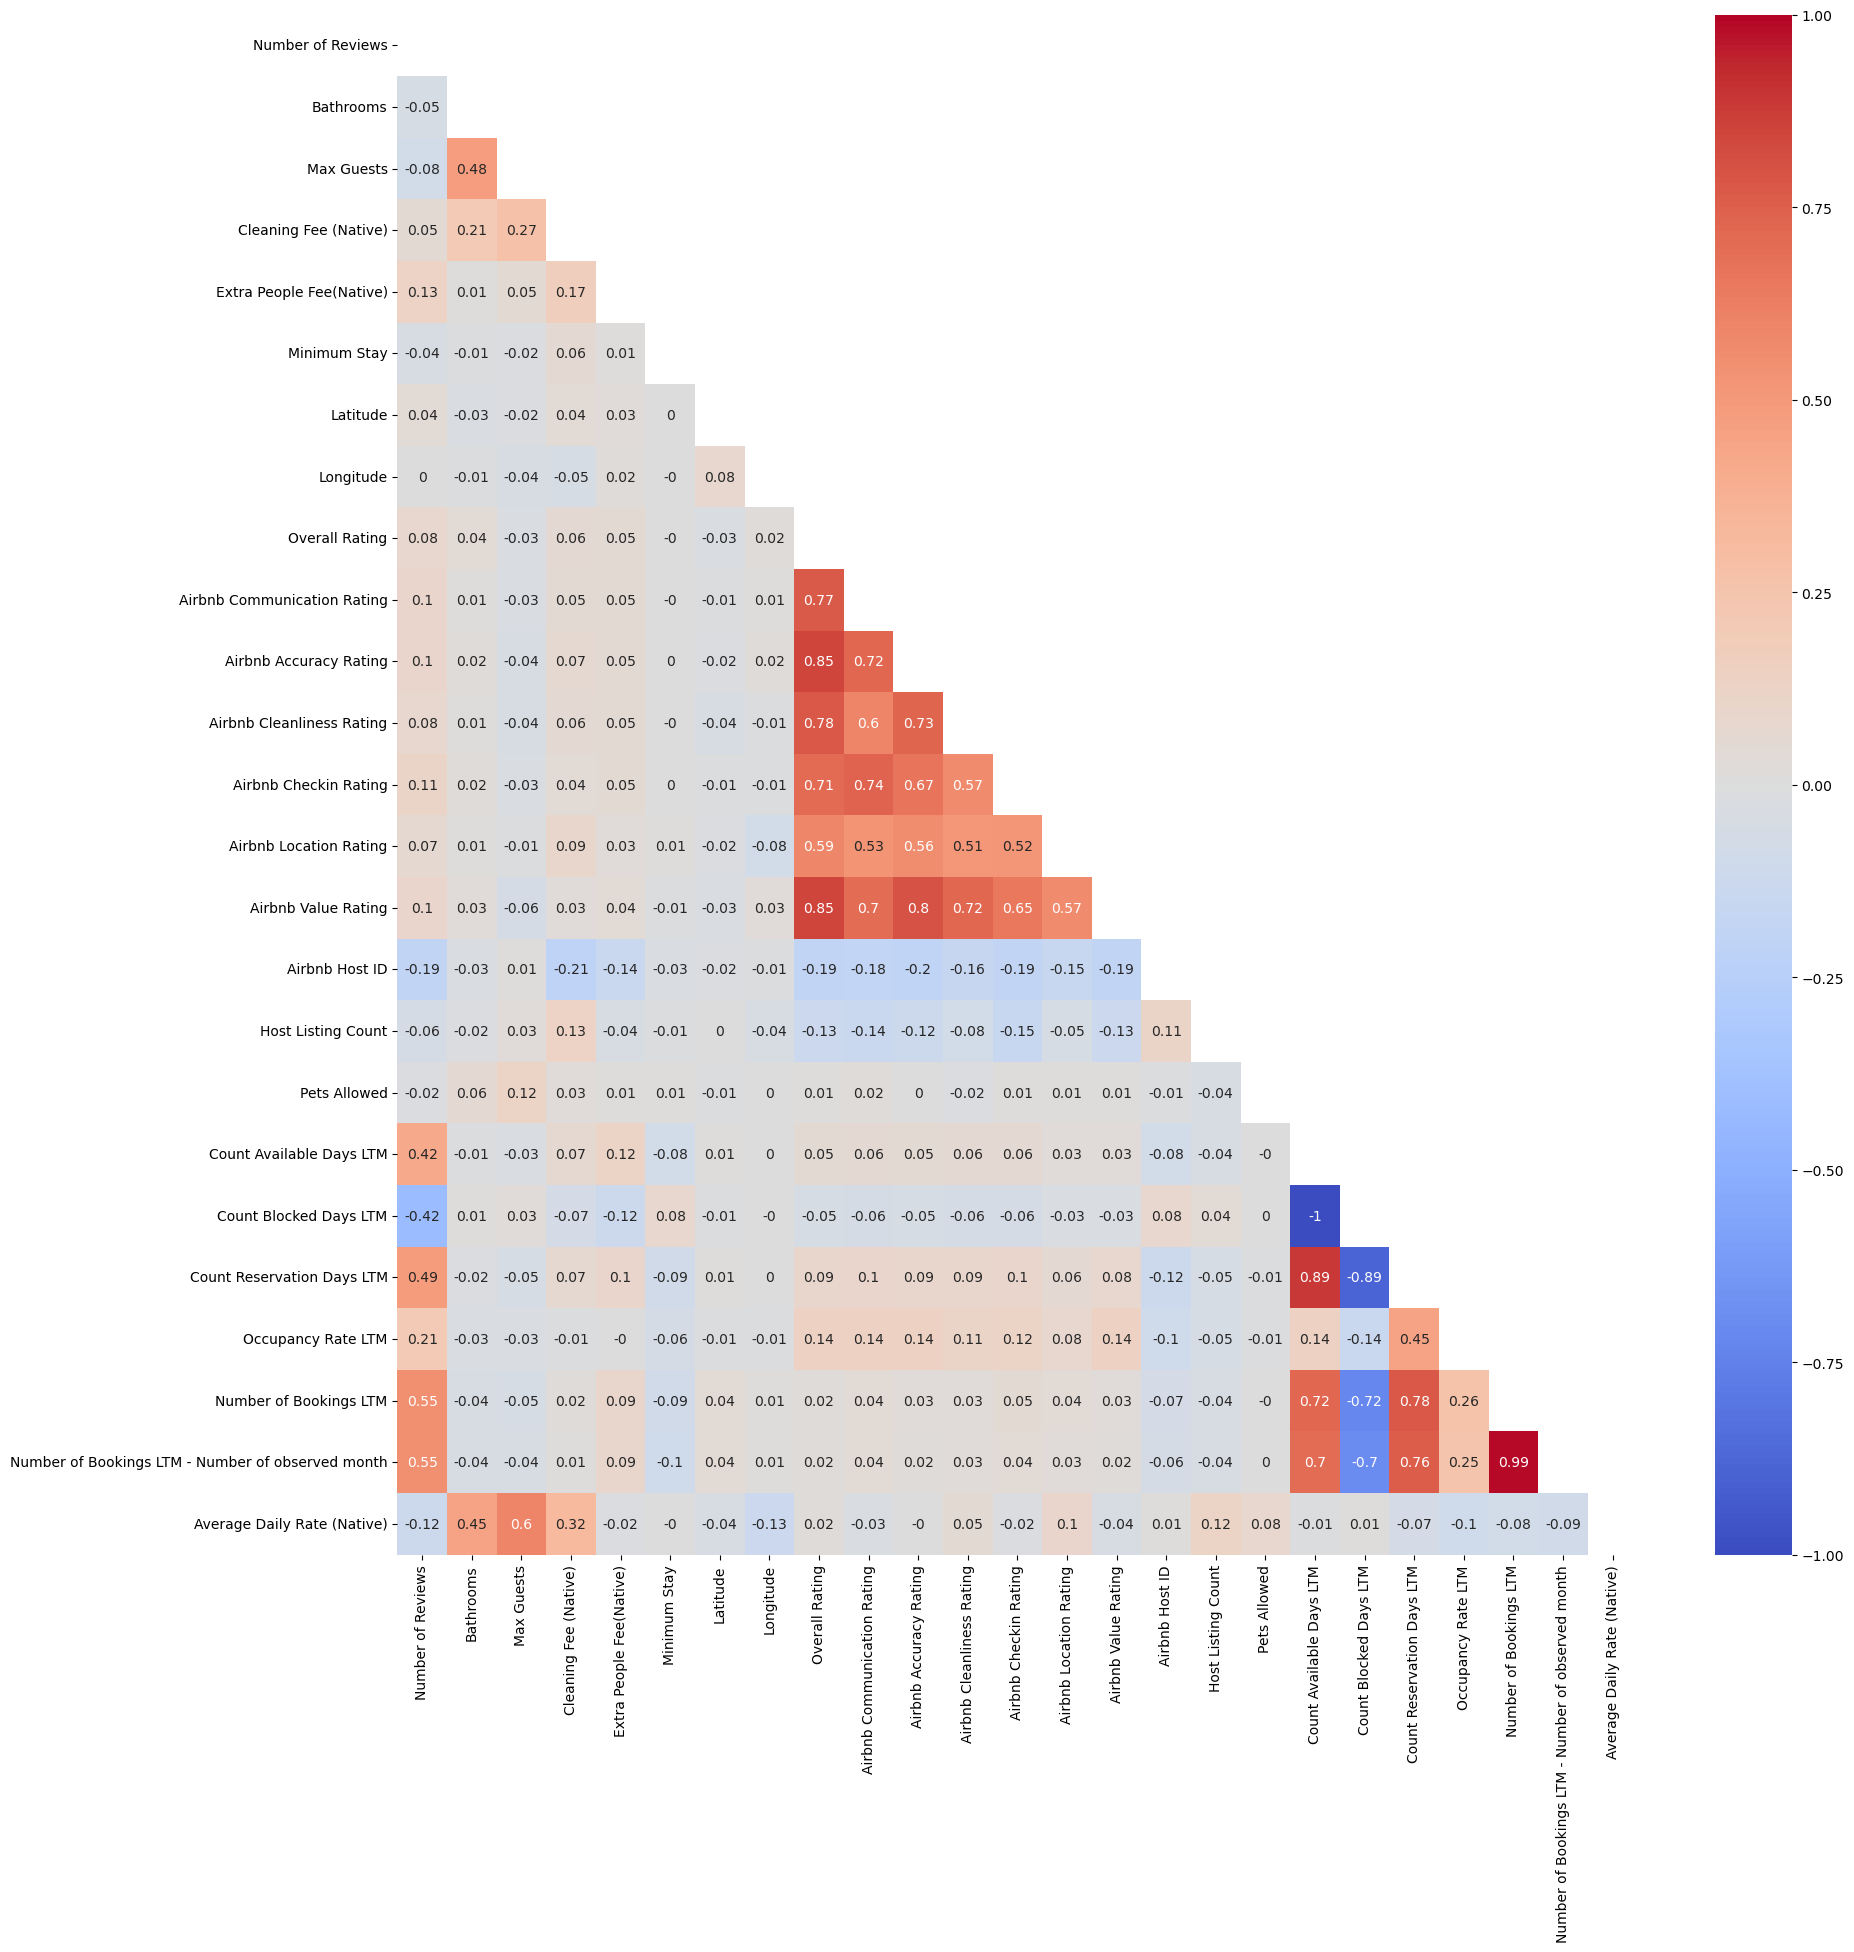

In [114]:
# calculate all the correlations between each independent numerical variable

def plot_corr_heatmap(X_num_cols):
    corr_df = X_num_cols.corr()

    # mask for upper-triangle
    mask = np.triu(corr_df)

    # vaisualise heatmap
    plt.figure(figsize=(20, 20))
    sns.heatmap(corr_df.round(2),
                annot=True,
                center=0,
                vmax=1,
                vmin=-1,
                mask=mask,
                cmap='coolwarm')
    plt.show()

plot_corr_heatmap(X_num_cols)

The above correlation headmap shows there are some significant correlations several of the independent variables. These will be worked through on a case-by-case basis. 

To begin, the 'Number of Bookings LTM and 'Number of Bookings LTM - Number of observed Month' will be addressed:


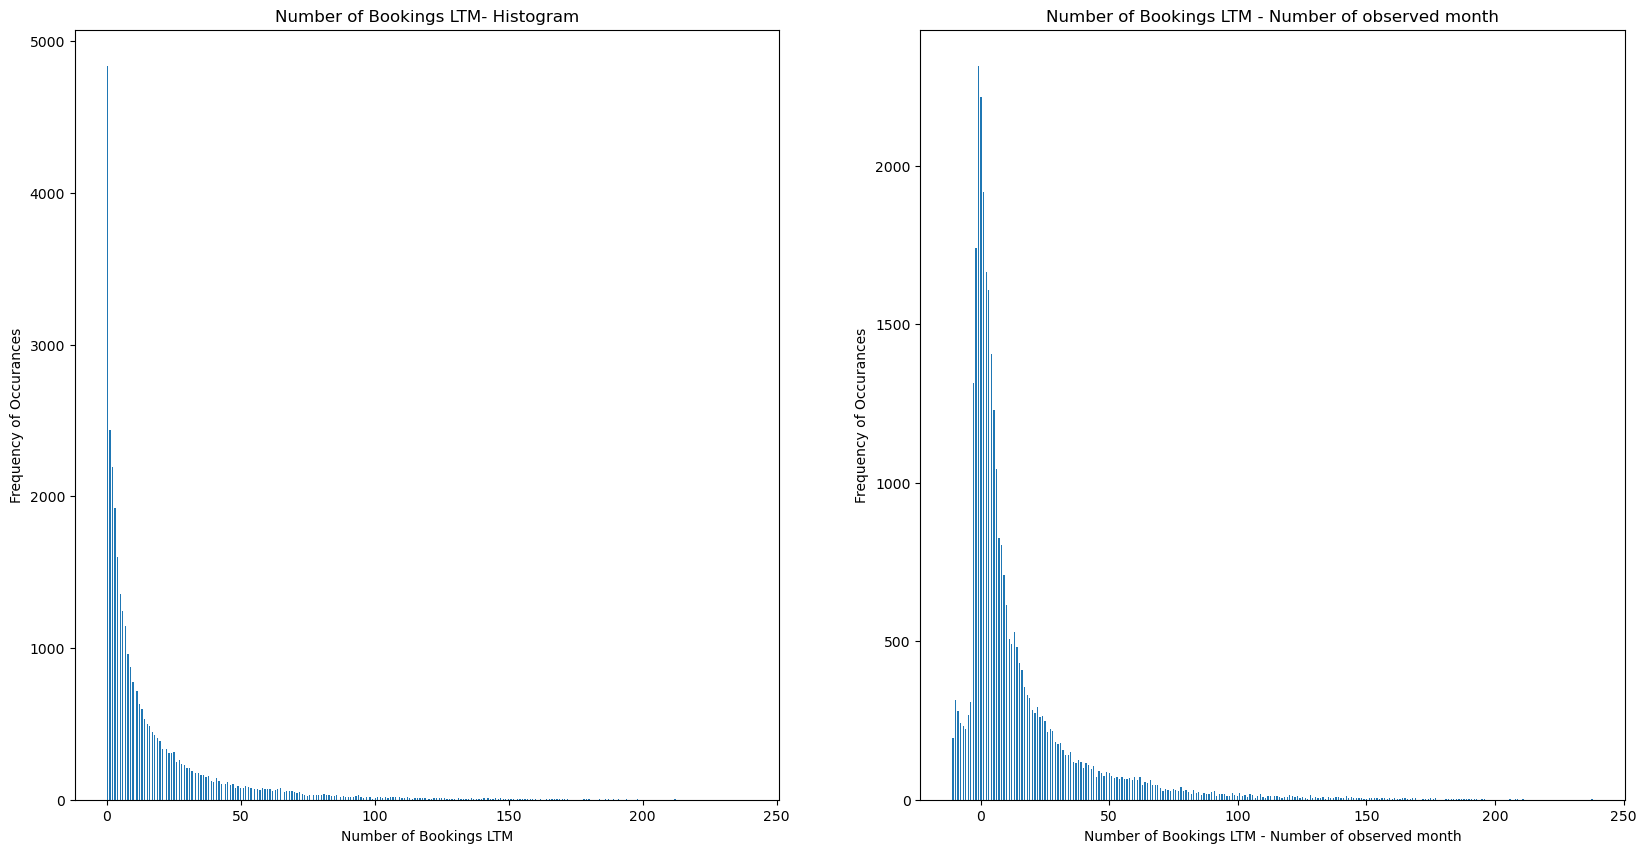

In [124]:
# Histograms of both will be produced:
plt.subplots(1,2, figsize=(20,10))

plt.subplot(1,2,1)
plt.hist(airbnb_ldn['Number of Bookings LTM'], bins=500)
plt.title('Number of Bookings LTM- Histogram')
plt.xlabel('Number of Bookings LTM')
plt.ylabel('Frequency of Occurances')

plt.subplot(1,2,2)
plt.hist(airbnb_ldn['Number of Bookings LTM - Number of observed month'], bins=500)
plt.title('Number of Bookings LTM - Number of observed month')
plt.xlabel('Number of Bookings LTM - Number of observed month')
plt.ylabel('Frequency of Occurances')


plt.show()

Both columns follow similar 'right-skewed' distributions, with the maximum value for both being above 200. 'Number of Bookings LTM - Number of observed month' (LTM-OM) has negative values, whereas all of the 'Number of Bookings LTM' (LTM) are positive. LTM has a a greater quantity of values with a zero (or very close to) value, this could suggest that all negative valeus in the (LTM-OM) column, are considered '0' values in the LTM column. The meaning of the LTM-OM column is not immediatly obvious, it will be explored further:

In [132]:
print(f"The maximum value for LTM-OM is {airbnb_ldn['Number of Bookings LTM - Number of observed month'].max()}, and the min value is {airbnb_ldn['Number of Bookings LTM - Number of observed month'].min()}.")
print(f"The maximum value for LTM is: {airbnb_ldn['Number of Bookings LTM'].max()}, and the min value is {airbnb_ldn['Number of Bookings LTM'].min()}.")


The maximum value for LTM-OM is 238, and the min value is -11.
The maximum value for LTM is: 239, and the min value is 0.


Both LTM-OM and LTM have very similar max values and distributions. To address the correlation issue for these two columns, it would be best to drop one. They both share very similar max values and distributions, but the meaning of LTM-OM is not entirely clear and the existence of the negative values could present problems at later stages of the modelling. Therefore, LTM-OM will be dropped.

In [133]:
# drop the column from both relevant dataframes within this worksheet:
X_num_cols.drop(columns='Number of Bookings LTM - Number of observed month', inplace=True)
airbnb_ldn.drop(columns='Number of Bookings LTM - Number of observed month', inplace=True)

The three columns, 'Count Available Days LTM' (CAD), 'Count Blocked Days LTM' (CBD) and 'Count Reservation Days LTM' (CRD), all have very high correlations; CBD and CRD have a perfect inverse correlation.
CBD and CRD will be looked into first:

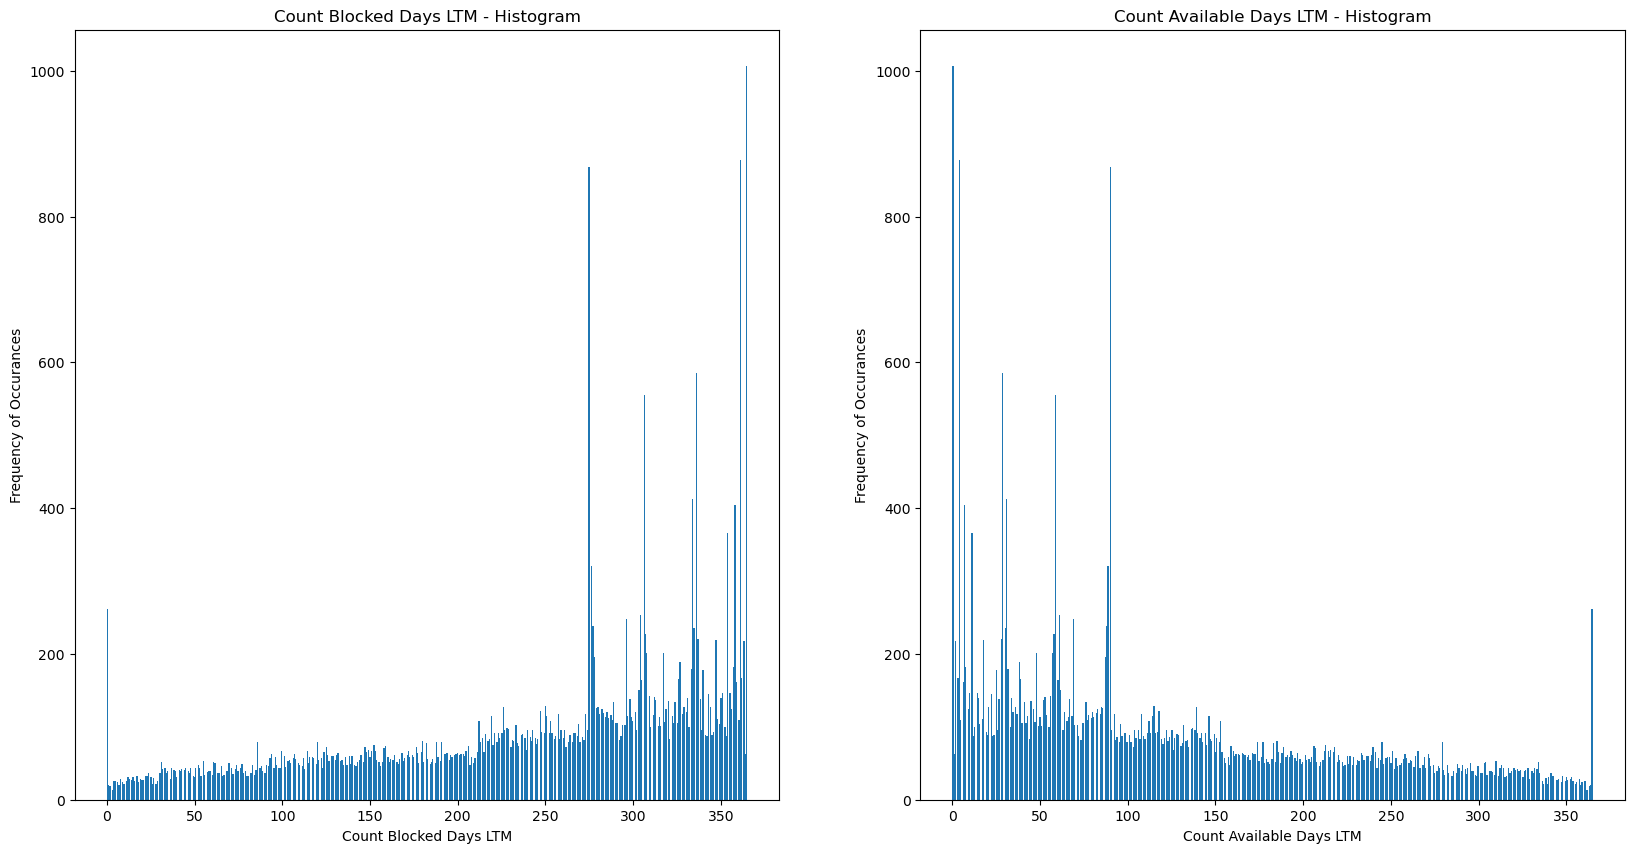

In [136]:
# Histograms of both will be produced:
plt.subplots(1,2, figsize=(20,10))

plt.subplot(1,2,1)
plt.hist(airbnb_ldn['Count Blocked Days LTM'], bins=500)
plt.title('Count Blocked Days LTM - Histogram')
plt.xlabel('Count Blocked Days LTM')
plt.ylabel('Frequency of Occurances')

plt.subplot(1,2,2)
plt.hist(airbnb_ldn['Count Available Days LTM'], bins=500)
plt.title('Count Available Days LTM - Histogram')
plt.xlabel('Count Available Days LTM')
plt.ylabel('Frequency of Occurances')


plt.show()

As expected, both columns histograms are mirrored versions of each other and keeping them both in the dataframe is pointless; one will be dropped. For the purpose of modelling, it is slightly 'computationally cheap' to work with more smaller numbers rather than more larger ones. For that reason, 'Count Blocked Days LTM' will be dropped, as it have a higher quantity of larger numbers.

In [137]:
# drop the column from both relevant dataframes within this worksheet:
X_num_cols.drop(columns='Count Blocked Days LTM', inplace=True)
airbnb_ldn.drop(columns='Count Blocked Days LTM', inplace=True)

Now the 'Count Reservation Days LTM and 'Count Available Days LTM' can be compared:

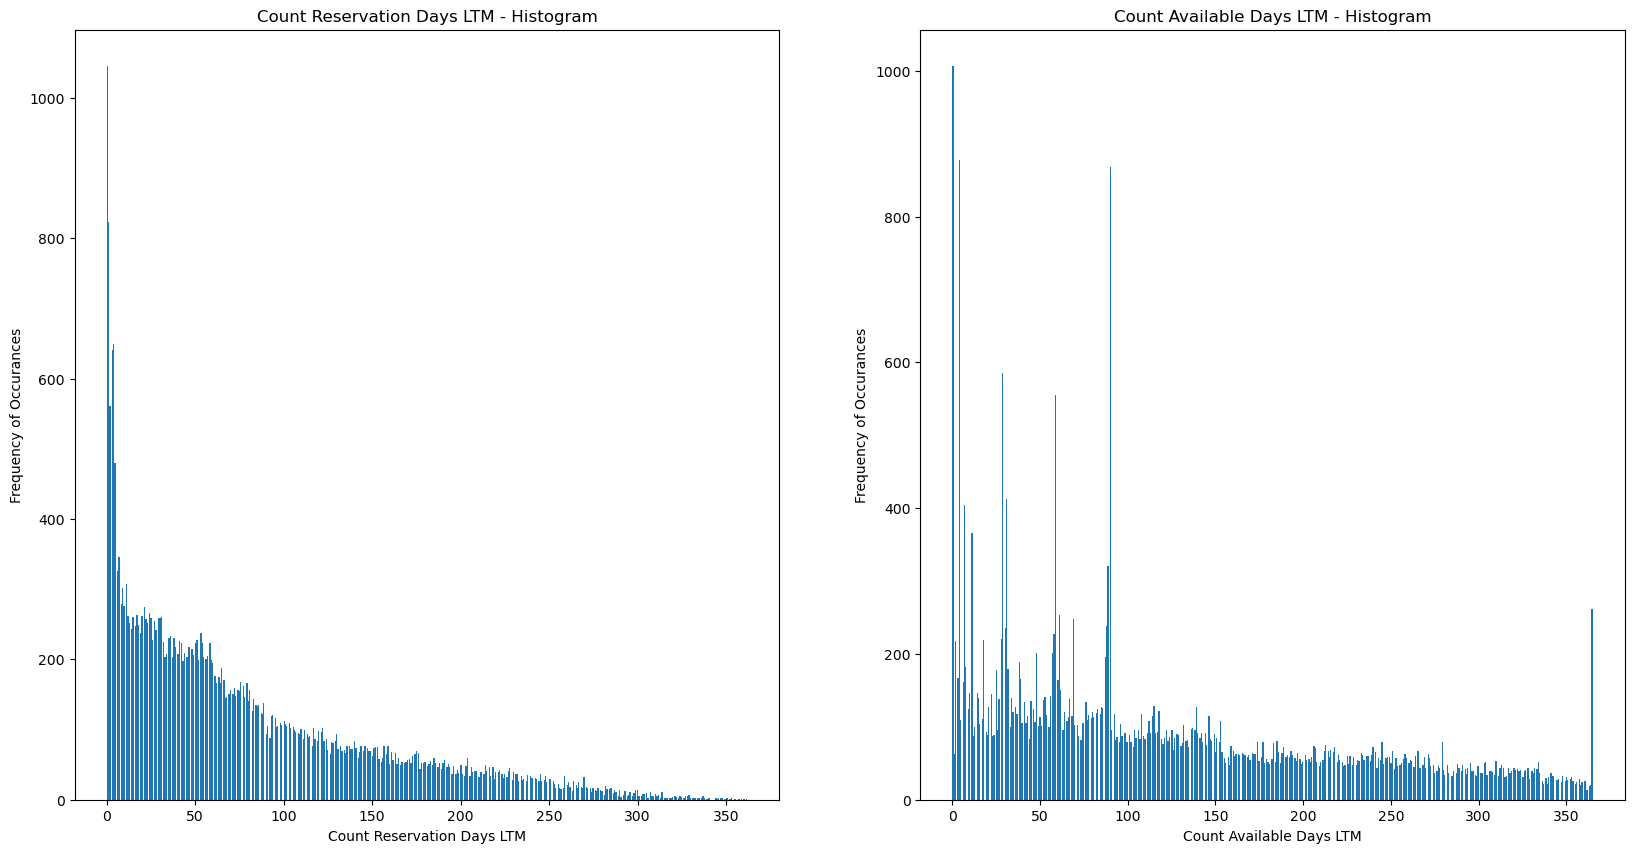

In [139]:
# Histograms of both will be produced:
plt.subplots(1,2, figsize=(20,10))

plt.subplot(1,2,1)
plt.hist(airbnb_ldn['Count Reservation Days LTM'], bins=500)
plt.title('Count Reservation Days LTM - Histogram')
plt.xlabel('Count Reservation Days LTM')
plt.ylabel('Frequency of Occurances')

plt.subplot(1,2,2)
plt.hist(airbnb_ldn['Count Available Days LTM'], bins=500)
plt.title('Count Available Days LTM - Histogram')
plt.xlabel('Count Available Days LTM')
plt.ylabel('Frequency of Occurances')

plt.show()

Both histograms follow fairly similar trends, although CRD follows more of a consistent 'right-skewed' distribution. Both graphs will be 'log' transformed, to see how this changes the distribution:


In [ ]:
# create a subplots structure with 4 columns and 5 rows
cols = 4
rows = len(num_cols_log.columns)//cols + 1

plt.figure(figsize=(17, 20))
plt.tight_layout()
plt.subplots_adjust(hspace = 1)
plt.suptitle('Log-Transformed Variable Distributions', y=0.92)

for i, column in enumerate(num_cols_log.columns):
    ax = plt.subplot(rows, cols, i+1)
    ax.set_title(f"Feature: {column}", size=10)
    ax.hist(num_cols_log[column], bins=100, color='darkgreen')

plt.show()

In [146]:
# add 1 to both columns to avoid taking the log of 0
c_d_log = np.log(num_cols[['Count Reservation Days LTM', 'Count Available Days LTM']] + 1 )


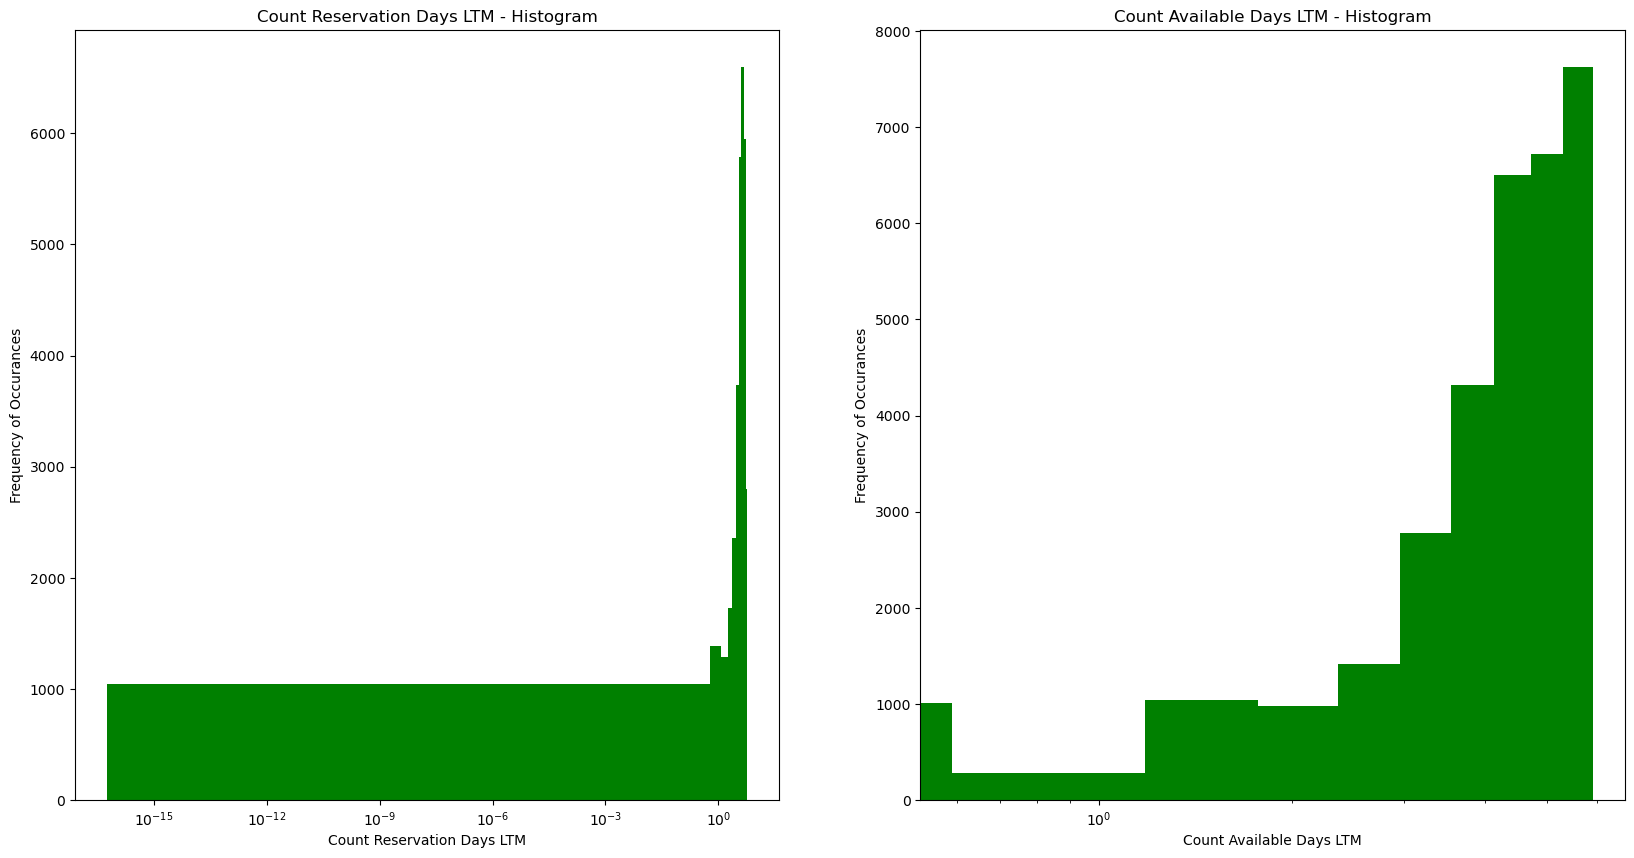

In [143]:
# Histograms of both will be produced:
plt.subplots(1,2, figsize=(20,10))

plt.subplot(1,2,1)
plt.hist(crd_log, bins=100, color='green')
plt.title('Count Reservation Days LTM - Histogram')
plt.xlabel('Count Reservation Days LTM')
plt.ylabel('Frequency of Occurances')
plt.xscale('log')

plt.subplot(1,2,2)
plt.hist(cad_log, bins=100, color='green')
plt.title('Count Available Days LTM - Histogram')
plt.xlabel('Count Available Days LTM')
plt.ylabel('Frequency of Occurances')
plt.xscale('log')

plt.show()

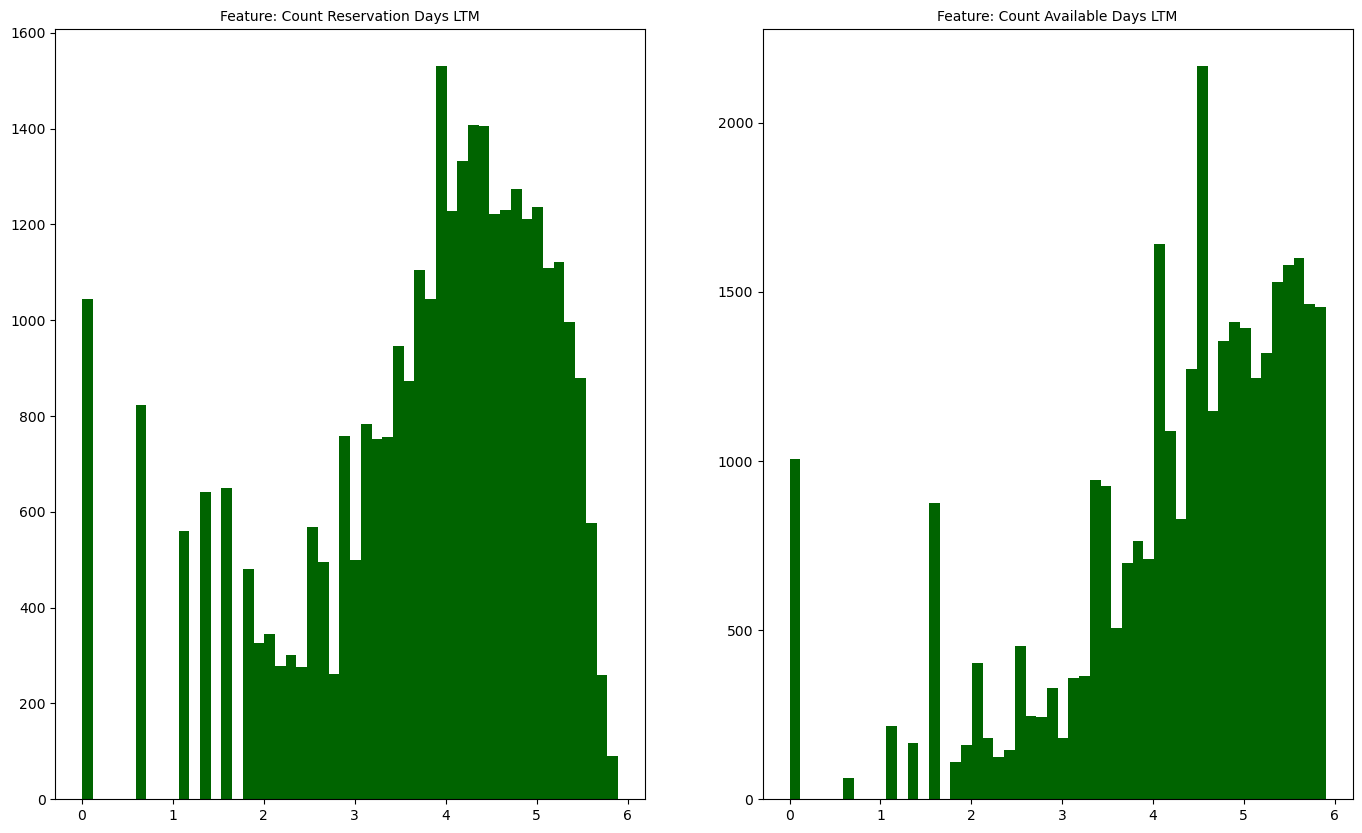

In [159]:
# create a subplots structure with 4 columns and 5 rows
cols = 4
rows = len(c_d_log.columns)//cols + 1

plt.figure(figsize=(35, 10))
plt.tight_layout()

for i, column in enumerate(c_d_log.columns):
    ax = plt.subplot(rows, cols, i+1)
    ax.set_title(f"Feature: {column}", size=10)
    ax.hist(c_d_log[column], bins=50, color='darkgreen')

plt.show()

**Come back to look at the log graphs in greater detail**

## Postcode Relevance

The first piece of EDA will be looking at the influence different regions have. To accurately model the dataset based on regions, the different rows must be grouped based on relevant locational differences. There are several columns that have locational information, these are: 'City', 'Zipcode' (sometimes referred to as Postcode), 'Latitude' and 'Longitude'. All of these different columns contain information that can and will be useful at different points in this project. For now, the easiest way to split the various rows of information is using the 'Zipcode' column.

Dataframes will be created for each of the different main London postal code prefix regions (denoted by the first or first two characters of the Zipcode). These are: W, WC, SW, NW, N, E, EC, SE.

In [7]:
# Create dataframes for each of the different postcode combinations in London:
w_zip = airbnb_ldn[airbnb_ldn['Zipcode'].str.slice(0,1).str.contains('W') &
                    ~airbnb_ldn['Zipcode'].str.slice(1,2).str.contains('C')]

n_zip = airbnb_ldn[airbnb_ldn['Zipcode'].str.slice(0,1).str.contains('N') &
                    ~airbnb_ldn['Zipcode'].str.slice(1,2).str.contains('E') &
                    ~airbnb_ldn['Zipcode'].str.slice(1,2).str.contains('W')]

e_zip = airbnb_ldn[airbnb_ldn['Zipcode'].str.slice(0,1).str.contains('E') &
                    ~airbnb_ldn['Zipcode'].str.slice(1,2).str.contains('C')]

wc_zip = airbnb_ldn[airbnb_ldn['Zipcode'].str.contains('WC')]

nw_zip = airbnb_ldn[airbnb_ldn['Zipcode'].str.slice(0,2).str.contains('NW')]

sw_zip = airbnb_ldn[airbnb_ldn['Zipcode'].str.slice(0,2).str.contains('SW')]

se_zip = airbnb_ldn[airbnb_ldn['Zipcode'].str.slice(0,2).str.contains('SE')]

ec_zip = airbnb_ldn[airbnb_ldn['Zipcode'].str.slice(0,2).str.contains('EC')]

The main dataframe has been split into separate dataframes for each London postcode prefix. 

The mean of the 'Average Daily Rate (Native)', will be plotted:

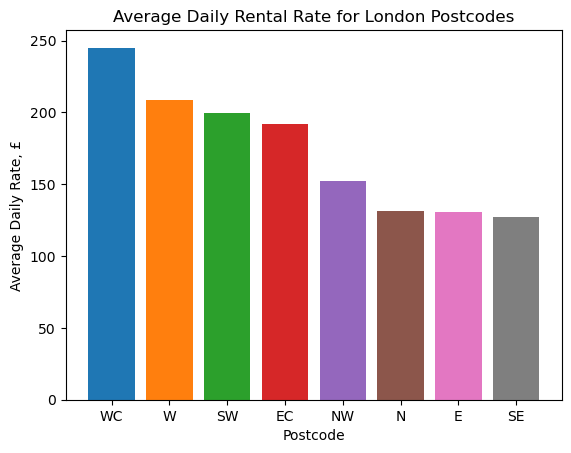

In [8]:
plt.figure()
plt.bar('WC', wc_zip['Average Daily Rate (Native)'].mean())
plt.bar('W', w_zip['Average Daily Rate (Native)'].mean())
plt.bar('SW', sw_zip['Average Daily Rate (Native)'].mean())
plt.bar('EC', ec_zip['Average Daily Rate (Native)'].mean())
plt.bar('NW', nw_zip['Average Daily Rate (Native)'].mean())
plt.bar('N', n_zip['Average Daily Rate (Native)'].mean())
plt.bar('E', e_zip['Average Daily Rate (Native)'].mean())
plt.bar('SE', se_zip['Average Daily Rate (Native)'].mean())
plt.xlabel('Postcode')
plt.ylabel('Average Daily Rate, £')
plt.title('Average Daily Rental Rate for London Postcodes')
plt.show()

Looking at the bar chart above, it can be seen that the three most expensive regions all have a 'W' in their postcode prefix. This would indicate, that rental properties west of central in London, tend to demand a higher daily rental rate.

Hence, an initial insight is that there does definitely seem to be some correlation between London region and average daily rental rate. Will the conclusion being that properties with a 'W' in their prefix tend to be more expensive to rent.

Now, the quantity of Airbnb properties within different postcodes will be investigated:

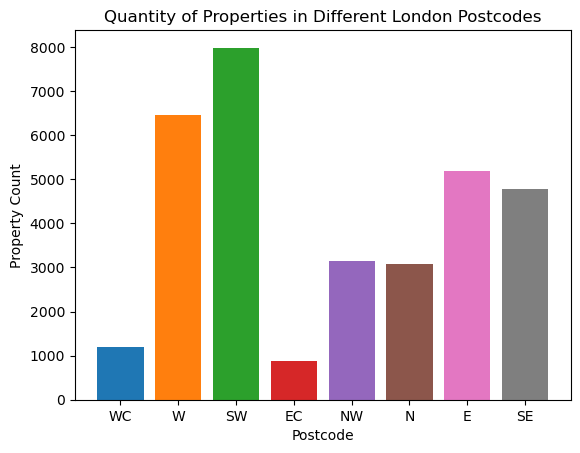

In [9]:
# determining the number of airbnb properties within each postcode:

plt.figure()
plt.bar('WC', len(wc_zip))
plt.bar('W', len(w_zip))
plt.bar('SW', len(sw_zip))
plt.bar('EC', len(ec_zip))
plt.bar('NW', len(nw_zip))
plt.bar('N', len(n_zip))
plt.bar('E', len(e_zip))
plt.bar('SE', len(se_zip))
plt.xlabel('Postcode')
plt.ylabel('Property Count')
plt.title('Quantity of Properties in Different London Postcodes')
plt.show()

From the bar chart above, it can be seen that 'SW' and 'W' are the two postal regions with the highest quantity of Airbnb properties, these are also two of the most expensive areas to rent.

Initially, it could be suggested that W and SW would be good places to invest in an Airbnb property. This will be investigated further to determine the relative success of Airbnb properties within these areas:

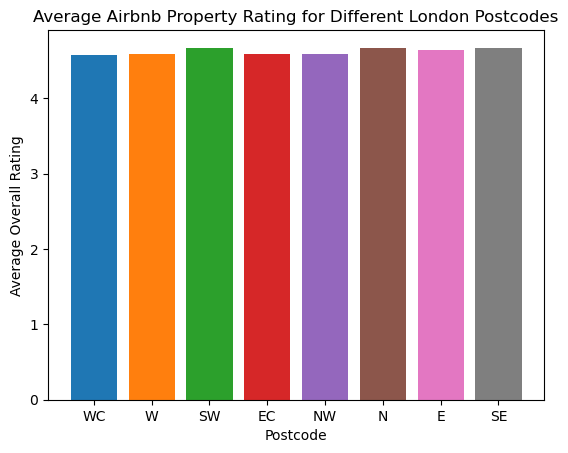

In [10]:
# plotting average overall rating against postcode region:

plt.figure()
plt.bar('WC', wc_zip['Overall Rating'].mean())
plt.bar('W', w_zip['Overall Rating'].mean())
plt.bar('SW', sw_zip['Overall Rating'].mean())
plt.bar('EC', ec_zip['Overall Rating'].mean())
plt.bar('NW', nw_zip['Overall Rating'].mean())
plt.bar('N', n_zip['Overall Rating'].mean())
plt.bar('E', e_zip['Overall Rating'].mean())
plt.bar('SE', se_zip['Overall Rating'].mean())
plt.xlabel('Postcode')
plt.ylabel('Average Overall Rating')
plt.title('Average Airbnb Property Rating for Different London Postcodes')
plt.show()

The results are very close, but it looks as though 'SW' potentially has the highest average rating. This will be confirmed numerically: 

In [11]:
print(f"The average overall rating for WC properties is {wc_zip['Overall Rating'].mean()} stars")
print(f"The average overall rating for W properties is {w_zip['Overall Rating'].mean()} stars")
print(f"The average overall rating for SW properties is {sw_zip['Overall Rating'].mean()} stars")
print(f"The average overall rating for EC properties is {ec_zip['Overall Rating'].mean()} stars")
print(f"The average overall rating for NW properties is {nw_zip['Overall Rating'].mean()} stars")
print(f"The average overall rating for N properties is {n_zip['Overall Rating'].mean()} stars")
print(f"The average overall rating for E properties is {e_zip['Overall Rating'].mean()} stars")
print(f"The average overall rating for SE properties is {se_zip['Overall Rating'].mean()} stars")

The average overall rating for WC properties is 4.576090604026845 stars
The average overall rating for W properties is 4.593088485975516 stars
The average overall rating for SW properties is 4.662279273638072 stars
The average overall rating for EC properties is 4.584096109839816 stars
The average overall rating for NW properties is 4.591134413727359 stars
The average overall rating for N properties is 4.666709886547812 stars
The average overall rating for E properties is 4.641505791505791 stars
The average overall rating for SE properties is 4.670670859538784 stars


It can be seen that SW, N and SE, are the leaders with approximately the same average rating of 4.67.

Now the average occupancy rate for each postcode will be assessed. Areas that charge a lot, have lots of properties and high ratings may not have much demand and hence can't necessarily be considered successful. This plot will be very influencial throughout the entire analysis:

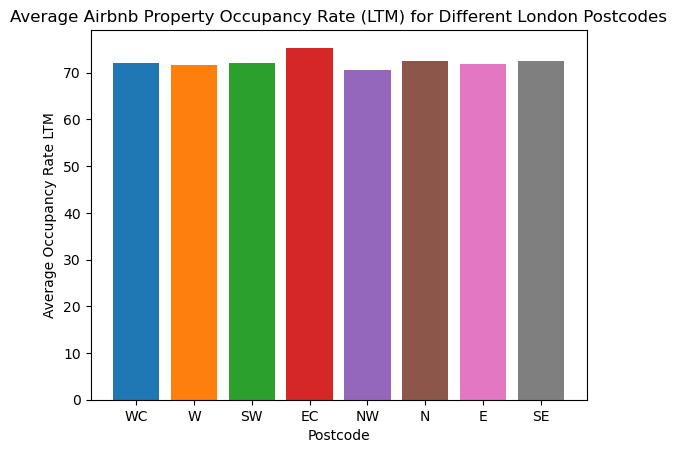

In [12]:
# plotting average occupancy rate against postcode region:

plt.figure()
plt.bar('WC', wc_zip['Occupancy Rate LTM'].mean())
plt.bar('W', w_zip['Occupancy Rate LTM'].mean())
plt.bar('SW', sw_zip['Occupancy Rate LTM'].mean())
plt.bar('EC', ec_zip['Occupancy Rate LTM'].mean())
plt.bar('NW', nw_zip['Occupancy Rate LTM'].mean())
plt.bar('N', n_zip['Occupancy Rate LTM'].mean())
plt.bar('E', e_zip['Occupancy Rate LTM'].mean())
plt.bar('SE', se_zip['Occupancy Rate LTM'].mean())
plt.xlabel('Postcode')
plt.ylabel('Average Occupancy Rate LTM')
plt.title('Average Airbnb Property Occupancy Rate (LTM) for Different London Postcodes')
plt.show()

The graph above shows that on the whole, all London postal regions have very high average occupation rates over the last 12 months; with EC having the highest. The previously identified areas of high rental income (WC, W, SW) all have average occupancy rates over 70%, proving that demand is high regardless of the rental amount. 

Hence, an immediate insight to prospective Airbnb property investors would be that purchasing a property with a W postcode would be a safebet in ensuring a high return on your initial investment. High rental rates, high overall ratings and high occupancy rates point to a very successful region.

**Looking at the correlation between overall rating and daily rental rate**

This comparison will be completed to see how the 'Avaerage Daily Rate' and the overall rating the property receives are related. 

First, the number of variables of overall ratings will be determined:

In [13]:
print(airbnb_ldn['Overall Rating'].unique())
print(f"The maximum rating a property can receive is {airbnb_ldn['Overall Rating'].max()} stars")
print(f"The minimum rating a property can receive is {airbnb_ldn['Overall Rating'].min()} stars")

[4.1 4.8 5.  4.  4.7 4.2 4.9 4.4 3.5 4.5 4.6 2.4 3.4 4.3 3.9 3.  1.  3.8
 3.6 3.2 3.1 2.  2.5 3.3 2.8 3.7 1.5 2.9 1.6 2.6 2.2 2.7 2.1]
The maximum rating a property can receive is 5.0 stars
The minimum rating a property can receive is 1.0 stars


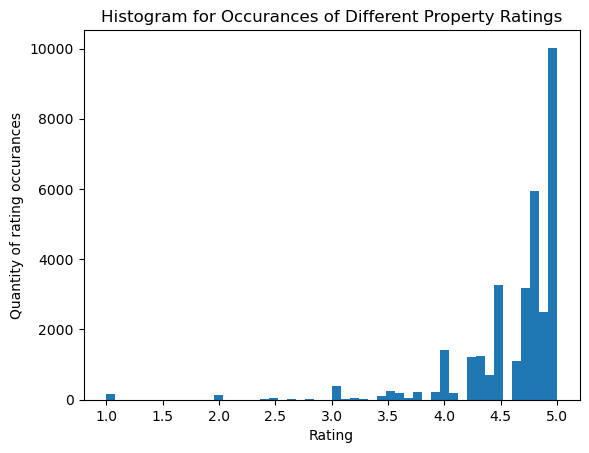

In [14]:
plt.figure()
plt.hist(airbnb_ldn['Overall Rating'], bins = 50)
plt.ylabel('Quantity of rating occurances')
plt.xlabel('Rating')
plt.title('Histogram for Occurances of Different Property Ratings')
plt.show()

Can see that the vast majority of ratings are above approximately 4.2 stars. Hence, the majority of London airbnb rental properties can be deemed to be off a high quality already.

These ratings and the Average daily rate will now be compared:

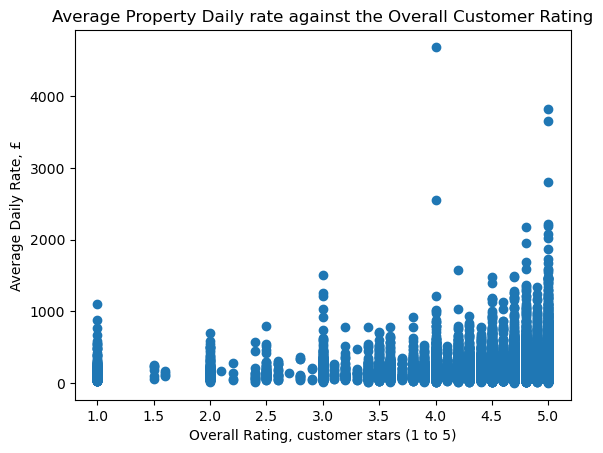

In [15]:
plt.figure()
plt.scatter(airbnb_ldn['Overall Rating'], airbnb_ldn['Average Daily Rate (Native)'])
plt.xlabel('Overall Rating, customer stars (1 to 5)')
plt.ylabel('Average Daily Rate, £')
plt.title('Average Property Daily rate against the Overall Customer Rating')
plt.show()

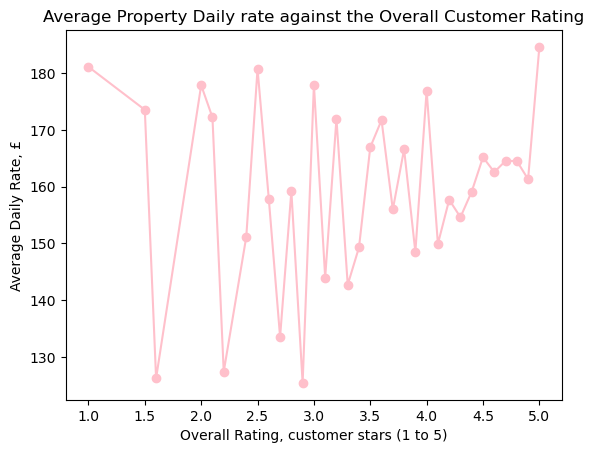

In [16]:
plt.figure()
(airbnb_ldn.groupby('Overall Rating')['Average Daily Rate (Native)'].mean()).plot(marker ='o', color ='pink')
plt.xlabel('Overall Rating, customer stars (1 to 5)')
plt.ylabel('Average Daily Rate, £')
plt.title('Average Property Daily rate against the Overall Customer Rating')
plt.show()

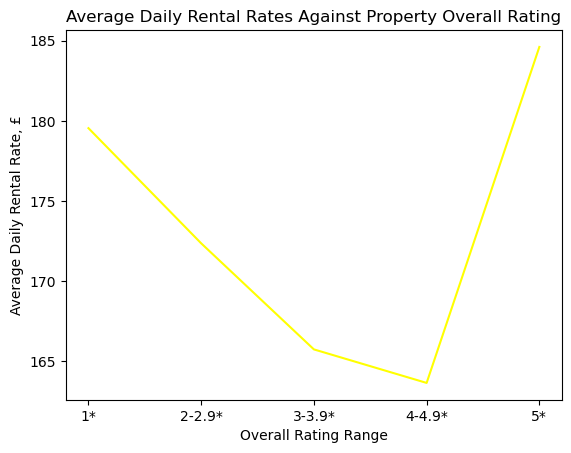

In [17]:
# ranged data

X_values = ['1*', '2-2.9*', '3-3.9*', '4-4.9*', '5*']

y_values = [
            airbnb_ldn[(airbnb_ldn['Overall Rating'] >= 1) & (airbnb_ldn['Overall Rating'] <= 1.9)]['Average Daily Rate (Native)'].mean(),
            airbnb_ldn[(airbnb_ldn['Overall Rating'] >= 2) & (airbnb_ldn['Overall Rating'] <= 2.9)]['Average Daily Rate (Native)'].mean(),
            airbnb_ldn[(airbnb_ldn['Overall Rating'] >= 3) & (airbnb_ldn['Overall Rating'] <= 3.9)]['Average Daily Rate (Native)'].mean(),
            airbnb_ldn[(airbnb_ldn['Overall Rating'] >= 4) & (airbnb_ldn['Overall Rating'] <= 4.9)]['Average Daily Rate (Native)'].mean(),
            airbnb_ldn[(airbnb_ldn['Overall Rating'] == 5)]['Average Daily Rate (Native)'].mean()
            ]
            
plt.plot(X_values, y_values, color='yellow')
plt.xlabel('Overall Rating Range')
plt.ylabel('Average Daily Rental Rate, £')
plt.title('Average Daily Rental Rates Against Property Overall Rating')
plt.show()


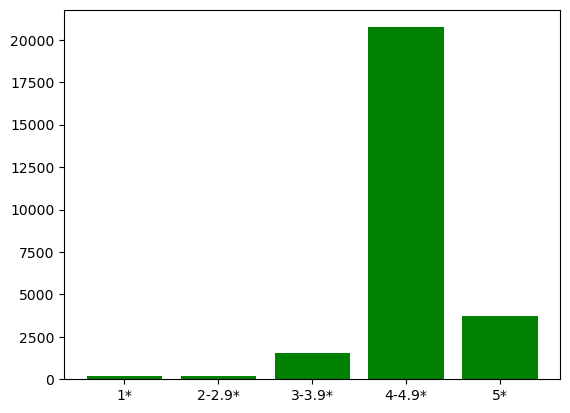

In [18]:
y_rating_quantities = [len(airbnb_ldn[(airbnb_ldn['Overall Rating'] >= 1) & (airbnb_ldn['Overall Rating'] <= 1.9)]),
                        len(airbnb_ldn[(airbnb_ldn['Overall Rating'] >= 2) & (airbnb_ldn['Overall Rating'] <= 2.9)]),
                        len(airbnb_ldn[(airbnb_ldn['Overall Rating'] >= 3) & (airbnb_ldn['Overall Rating'] <= 3.9)]),
                        len(airbnb_ldn[(airbnb_ldn['Overall Rating'] >= 4) & (airbnb_ldn['Overall Rating'] <= 4.9)]),
                        len(airbnb_ldn[(airbnb_ldn['Overall Rating'] == 5)].value_counts())]

plt.bar(X_values, y_rating_quantities, color = 'green')
plt.show()

In [19]:
len(airbnb_ldn[(airbnb_ldn['Overall Rating'] >= 4) & (airbnb_ldn['Overall Rating'] <= 4.9)])


20735

## EDA on the Target Column

The target column is the 'Annual Revenue (LTM)' column. 

This column will be explored further:

In [20]:
print(f"The maximum yearly income of any London Airbnb property is £{airbnb_ldn['Annual Revenue LTM (Native)'].max()}.")
print(f"The minimum yearly income of any London Airbnb property is £{airbnb_ldn['Annual Revenue LTM (Native)'].min()}.")

The maximum yearly income of any London Airbnb property is £357897.7.
The minimum yearly income of any London Airbnb property is £6.3.


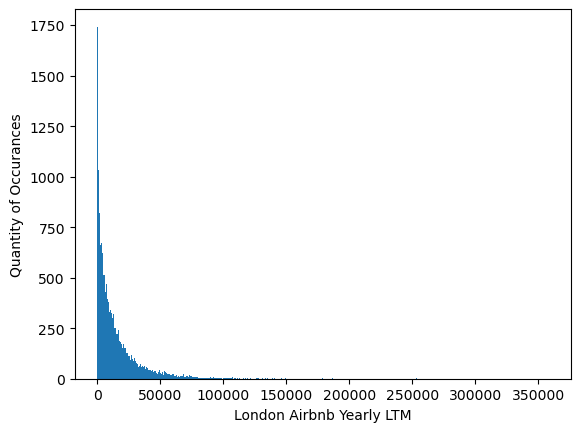

In [21]:
plt.figure()
plt.hist(airbnb_ldn['Annual Revenue LTM (Native)'], bins=1000)
plt.xlabel('London Airbnb Yearly LTM')
plt.ylabel('Quantity of Occurances')
plt.show()

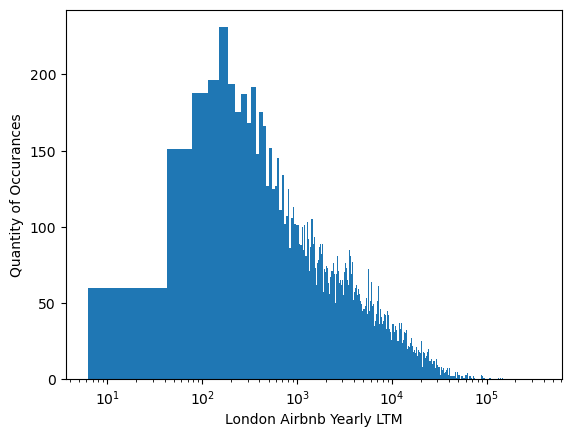

In [22]:
# Plot the same graph but using a 'log' scale on the x-axis, to see how this alteres/improves the distribution
plt.figure()
plt.hist(airbnb_ldn['Annual Revenue LTM (Native)'], bins=10000)
plt.xlabel('London Airbnb Yearly LTM')
plt.ylabel('Quantity of Occurances')
plt.xscale('log')
plt.show()

Initial aspects of EDA that are important:

**Complete now but will require re-ordering prior to submission**

In [23]:
airbnb_ldn.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 38 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Listing Title                                      5 non-null      object 
 1   Property Type                                      5 non-null      object 
 2   Listing Type                                       5 non-null      object 
 3   City                                               5 non-null      object 
 4   Zipcode                                            5 non-null      object 
 5   Number of Reviews                                  5 non-null      int64  
 6   Bedrooms                                           5 non-null      object 
 7   Bathrooms                                          5 non-null      int64  
 8   Max Guests                                         5 non-null      int64  
 9   Airbnb Superho

In [24]:
num_cols = airbnb_ldn.select_dtypes(include=['int', 'float64'])
num_cols.head().T

,0,1,2,3,4
Number of Reviews,9.000000e+00,1.100000e+01,1.000000e+00,2.000000e+01,0.000000e+00
Bathrooms,2.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00
Max Guests,6.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,2.000000e+00
Cleaning Fee (Native),1.548000e+02,0.000000e+00,0.000000e+00,3.480000e+01,0.000000e+00
Extra People Fee(Native),0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+00,0.000000e+00
Minimum Stay,3.000000e+00,1.000000e+00,7.000000e+00,5.000000e+00,5.000000e+00
Latitude,5.143105e+01,5.143399e+01,5.143500e+01,5.143531e+01,5.143532e+01
Longitude,-2.607400e-01,-2.565600e-01,-2.570000e-01,-2.564800e-01,-2.541300e-01
Overall Rating,4.100000e+00,4.800000e+00,5.000000e+00,4.800000e+00,4.000000e+00
Airbnb Communication Rating,9.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01


In [25]:
cat_cols = airbnb_ldn.select_dtypes(include='object')
cat_cols.head().T

,0,1,2,3,4
Listing Title,Cozy 2BR house with a garden view,GuestReady - Amazing home with a private garden,Cosy cottage on Richmond Park,"Entire Flat. Free parking, Garden , Richmond park",Maisonette inbetween Richmond Park and Wimbledon
Property Type,Entire home,Entire home,Entire home,Entire rental unit,Private room in rental unit
Listing Type,entire_home,entire_home,entire_home,entire_home,private_room
City,Greater London,Greater London,Greater London,Greater London,Greater London
Zipcode,SW15 3,SW15 3,SW15 3,SW15 3,SW15 3
Bedrooms,2,2,1,2,1
Airbnb Superhost,f,t,f,f,f
Cancellation Policy,strict_14_with_grace_period,NaN,NaN,strict_14_with_grace_period,strict_14_with_grace_period
Check-in Time,12:00 PM - 12:00 AM,3:00 PM - 12:00 AM,After 3:00 PM,3:00 PM - 11:00 PM,12:00 PM - 10:00 PM
Checkout Time,10:00 AM,11:00 AM,11:00 AM,11:00 AM,11:00 AM


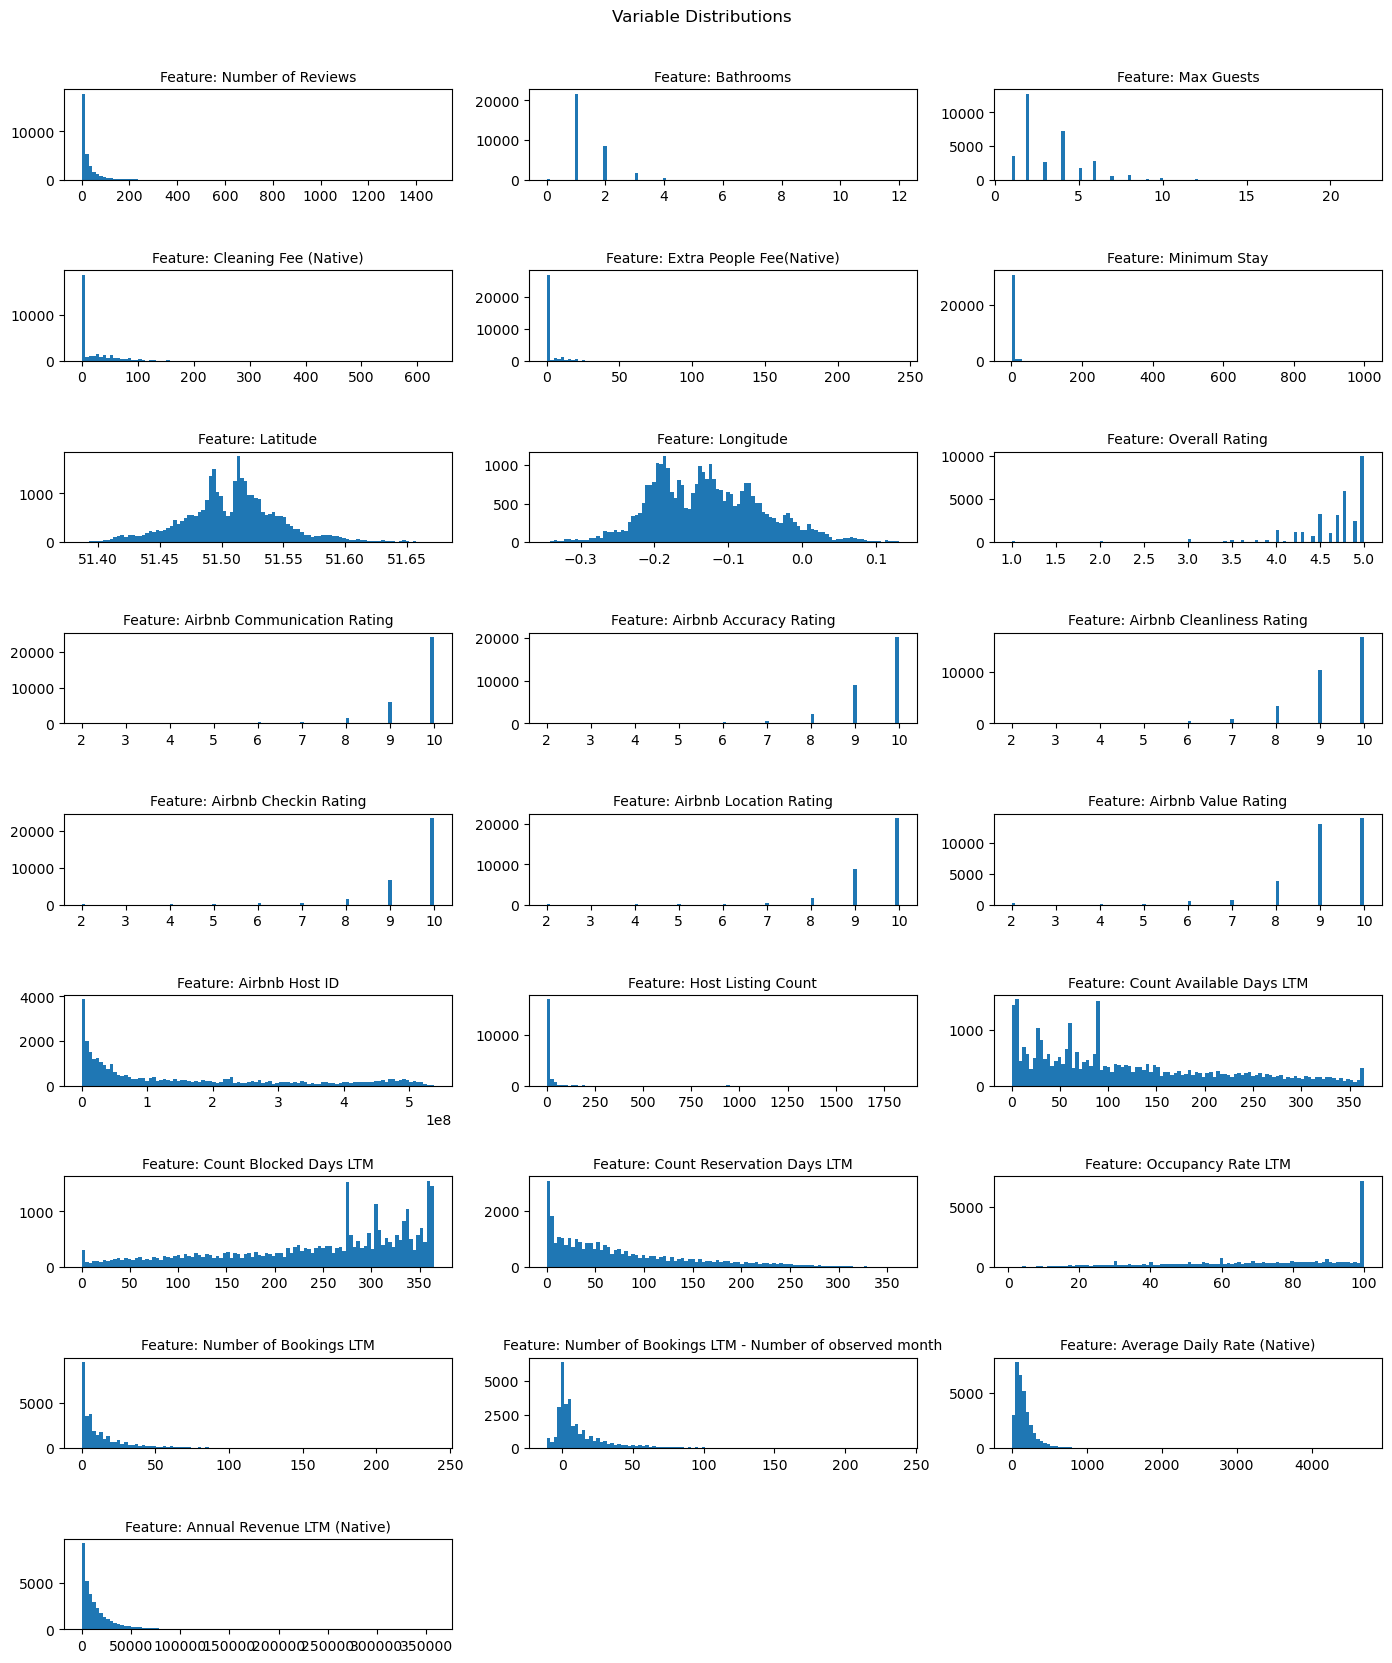

In [26]:
# create a subplots structure with 4 columns and 5 rows
cols = 3
rows = len(num_cols.columns)//cols + 1

plt.figure(figsize=(17, 20))
plt.tight_layout()
plt.subplots_adjust(hspace = 1)
plt.suptitle('Variable Distributions', y=0.92)

for i, column in enumerate(num_cols.columns):
    ax = plt.subplot(rows, cols, i+1)
    ax.set_title(f"Feature: {column}", size=10)
    ax.hist(num_cols[column], bins=100)


plt.show()

A lot of the columns are skewed (both left and right). A 'log' transformation can be used, to produce more normally distributed graphs for each of the numerical columns:

'Longitude', 'Latitude' and 'Number of Bookings LTM - Number of observed month' are being omitted as they all have negative values and therefore cannot be  

In [31]:
# Log scale all columns, add 1 to avoid taking the log of 0
num_cols_log = np.log(num_cols.drop(columns = ['Longitude', 'Latitude', 'Number of Bookings LTM - Number of observed month']) + 1)

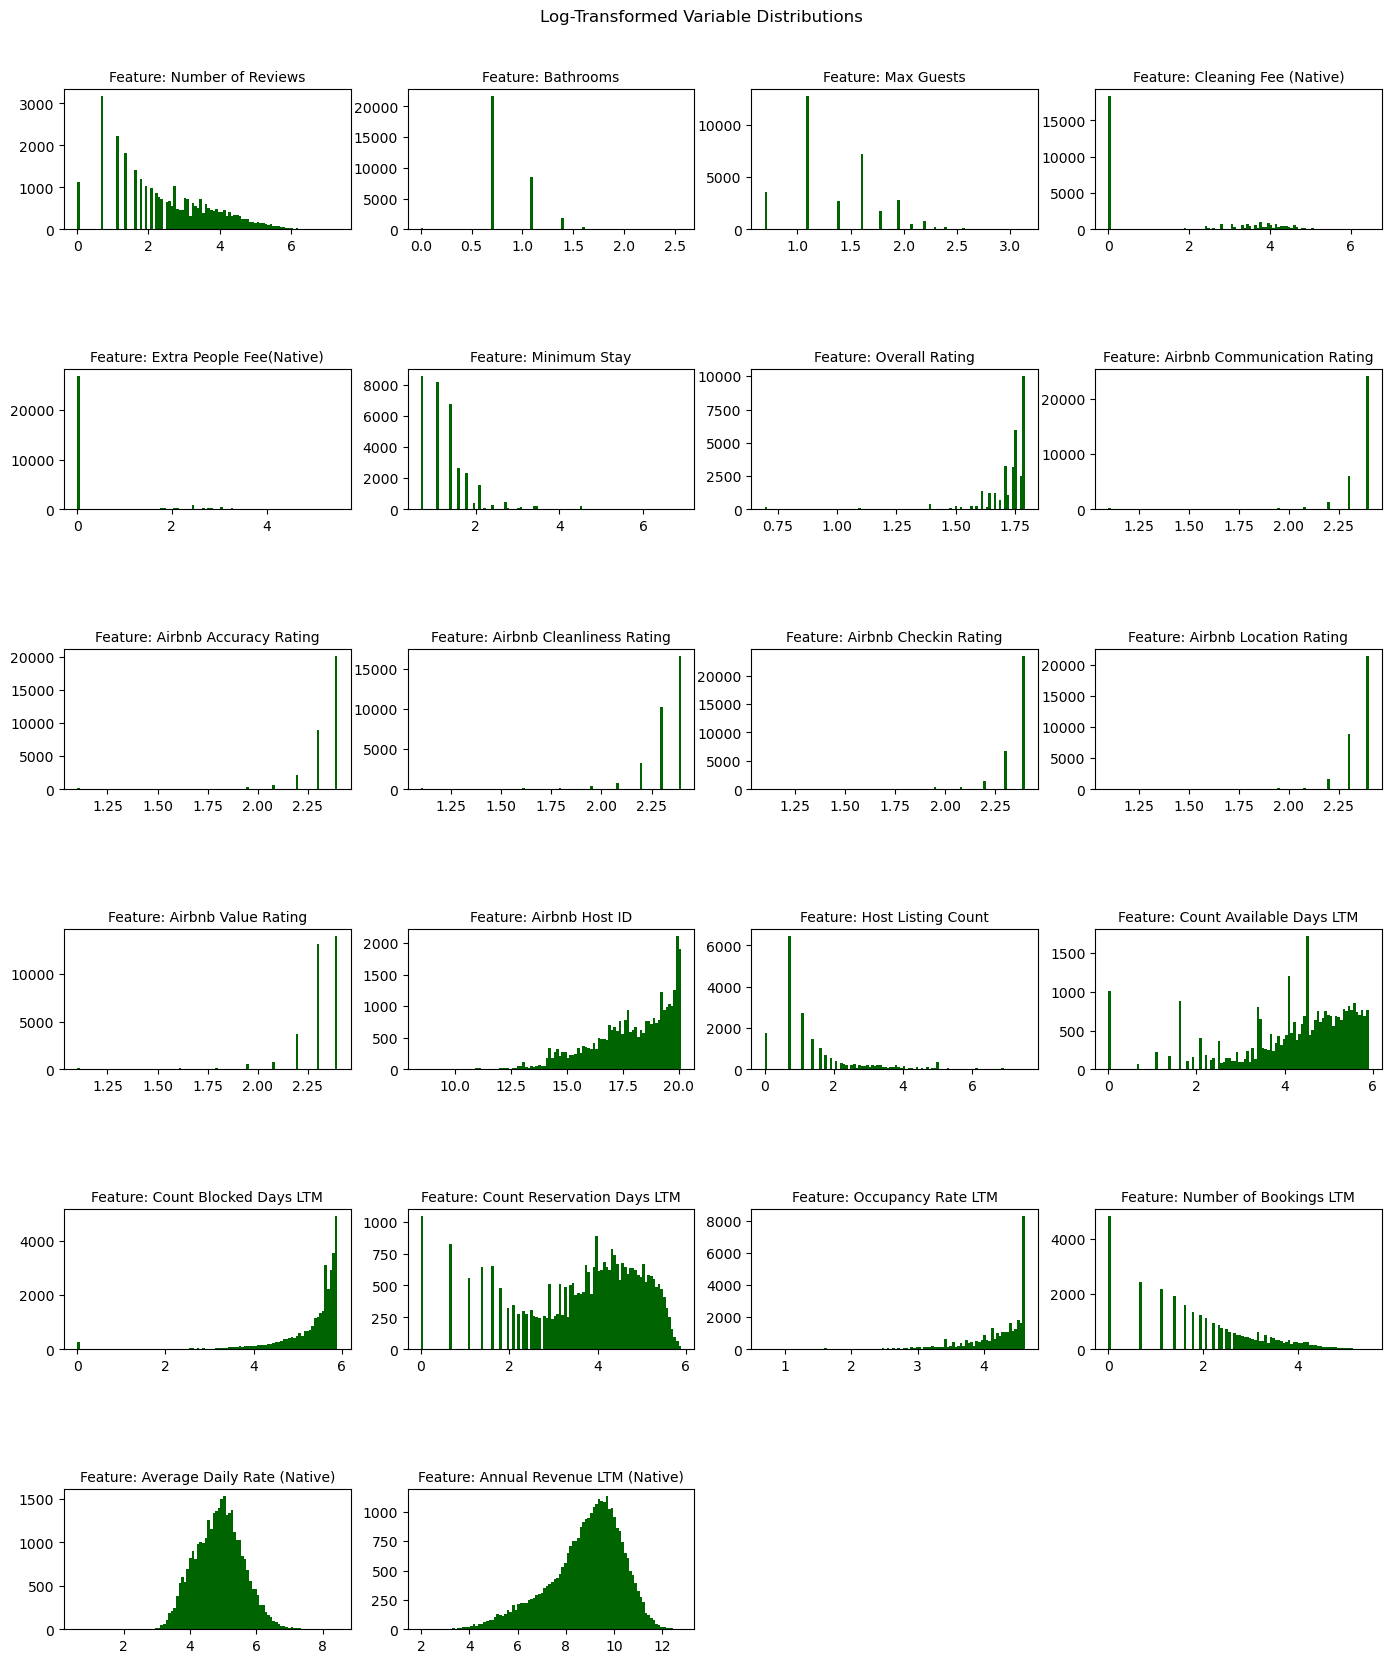

In [32]:
# create a subplots structure with 4 columns and 5 rows
cols = 4
rows = len(num_cols_log.columns)//cols + 1

plt.figure(figsize=(17, 20))
plt.tight_layout()
plt.subplots_adjust(hspace = 1)
plt.suptitle('Log-Transformed Variable Distributions', y=0.92)

for i, column in enumerate(num_cols_log.columns):
    ax = plt.subplot(rows, cols, i+1)
    ax.set_title(f"Feature: {column}", size=10)
    ax.hist(num_cols_log[column], bins=100, color='darkgreen')

plt.show()

There are negative values on the 'Number of Bookings LTM - Number of observed month' column. This is peculiar, as the my initial assumption was that all the values on this column should be positive, with zero being the minimum value. This will be investigated further.

In [33]:
airbnb_ldn['Number of Bookings LTM - Number of observed month'].min()

-11

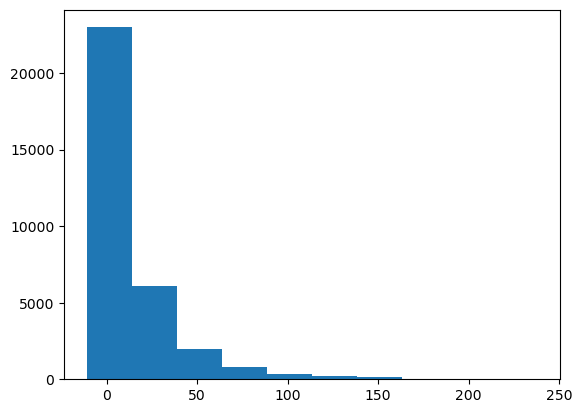

In [43]:
plt.figure()
plt.hist(airbnb_ldn['Number of Bookings LTM - Number of observed month'])
plt.show()

In [55]:
airbnb_ldn[airbnb_ldn['Number of Bookings LTM - Number of observed month'] == -11]

,Listing Title,Property Type,Listing Type,City,Zipcode,Number of Reviews,Bedrooms,Bathrooms,Max Guests,Airbnb Superhost,...,guest_controls,Pets Allowed,Count Available Days LTM,Count Blocked Days LTM,Count Reservation Days LTM,Occupancy Rate LTM,Number of Bookings LTM,Number of Bookings LTM - Number of observed month,Average Daily Rate (Native),Annual Revenue LTM (Native)
1051,"5 Bedroom Mews house,quiet, green & New in Che...",Entire home,entire_home,London,SW5 9,8,5,3,10,f,...,"{""allows_children"": true, ""allows_infants"": tr...",False,31,334,7,27,0,-11,581.4,4866.4
3038,"3 Boutique Apartments , close to Central London",Entire rental unit,entire_home,Greater London,SE17 1,0,Studio,1,3,f,...,"{""allows_children"": true, ""allows_infants"": tr...",False,73,292,46,76,0,-11,124.0,6880.9
4810,"Female only,comfortable,clean double room. Lo...",Private room in townhouse,private_room,Greater London,NW10 3,0,1,1,2,t,...,"{""allows_children"": false, ""allows_infants"": f...",False,7,358,4,69,0,-11,48.2,233.1
6835,Modern 1 Bedroom Apartment near Hampstead Heath,Entire apartment,entire_home,Greater London,NW3 2,0,1,1,3,f,...,"{""allows_children"": true, ""allows_infants"": tr...",False,35,330,4,14,0,-11,235.4,1153.4
8371,Pied A Terre in Spitalfields One bedroom flat,Entire rental unit,entire_home,Greater London,E1 6,5,1,1,2,f,...,"{""allows_children"": false, ""allows_infants"": f...",False,55,310,11,24,0,-11,83.0,1094.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31941,Cosy Single Room for Female in Charming Home,Private room in house,private_room,London,SE18 1,0,1,2,1,f,...,"{""allows_children"": false, ""allows_infants"": f...",False,31,334,17,66,0,-11,15.8,323.1
32006,"Homely Double in Abbey Wood, Garden + Parking",Private room in home,private_room,Greater London,SE2 9,0,1,1,2,f,...,"{""allows_children"": true, ""allows_infants"": fa...",False,31,334,13,50,0,-11,77.4,1200.0
32298,Portway Gem in Stratford,Entire apartment,entire_home,Greater London,E15 3,0,1,1,2,f,...,"{""allows_children"": true, ""allows_infants"": fa...",False,31,334,22,85,0,-11,113.0,2976.7
32445,Nice Small single room for 1 guest .,Private room in home,private_room,Greater London,E7 9,1,1,1,1,t,...,"{""allows_children"": false, ""allows_infants"": f...",False,65,300,52,96,0,-11,97.2,6063.2


In [42]:
# View rows with values less than zero:
airbnb_ldn[airbnb_ldn['Number of Bookings LTM - Number of observed month'] < 0 ]

,Listing Title,Property Type,Listing Type,City,Zipcode,Number of Reviews,Bedrooms,Bathrooms,Max Guests,Airbnb Superhost,...,guest_controls,Pets Allowed,Count Available Days LTM,Count Blocked Days LTM,Count Reservation Days LTM,Occupancy Rate LTM,Number of Bookings LTM,Number of Bookings LTM - Number of observed month,Average Daily Rate (Native),Annual Revenue LTM (Native)
2,Cosy cottage on Richmond Park,Entire home,entire_home,Greater London,SW15 3,1,1,2,3,f,...,"{""allows_children"": false, ""allows_infants"": f...",False,74,291,1,2,0,-2,233.1,345.2
6,"Friendly, clean and happy place, room for 2 pe...",Private room in home,private_room,Greater London,W13 9,5,1,2,2,f,...,"{""allows_children"": true, ""allows_infants"": tr...",False,11,354,5,55,1,-1,63.2,382.4
7,"Nice quiet 1 double & 1 single rooms, 3 people.",Private room in home,private_room,Greater London,W13 9,6,2,2,3,f,...,"{""allows_children"": true, ""allows_infants"": tr...",False,11,354,5,55,1,-1,126.4,764.7
10,Lovely room with Door lock and free parking .,Private room in casa particular,private_room,Greater London,SW15 4,11,1,1,1,f,...,"{""allows_children"": false, ""allows_infants"": f...",False,4,361,2,60,1,-1,37.9,90.9
13,"Extra Large Room, kid/pet friendly, cordial owner",Private room in townhouse,private_room,Greater London,SW14 7,14,1,1,1,f,...,"{""allows_children"": true, ""allows_infants"": tr...",False,36,329,10,59,2,-2,36.3,1516.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32646,Modern 3 bed flat in quiet London location,Entire rental unit,entire_home,London,E11 1,71,3,1,7,f,...,"{""allows_children"": true, ""allows_infants"": tr...",False,8,357,2,30,3,-7,82.2,351.6
32655,My BRAND NEW Home is Available!,Private room in home,private_room,Greater London,E11 1,2,1,1,2,f,...,"{""allows_children"": false, ""allows_infants"": f...",True,29,336,1,4,1,-2,62.4,72.7
32668,Spacious Room Safe Location With Garden View.,Private room in home,private_room,"South Woodford,",E18 1,13,1,1,1,f,...,"{""allows_children"": false, ""allows_infants"": f...",False,211,154,70,40,6,-4,55.3,4852.2
32672,"3 bedroom family house, 10 mins walk from stat...",Entire home,entire_home,Greater London,E18 2,6,2,2,5,f,...,"{""allows_children"": true, ""allows_infants"": tr...",True,101,264,37,44,2,-1,181.7,8074.6


The target column, of yearly revenue is completely dependent on the occupancy rate. The more attractive and appealing the property, the higher the occupancy rate will be and thus the higher the year revenue. Therefore, the 'occupancy rate' column, cannot necessarily be treated as a independent variable, it will most likely have some linear correlation with the yearly revenue; this will have to be addressed, with a solution being devised that optmises both elements effectively. 

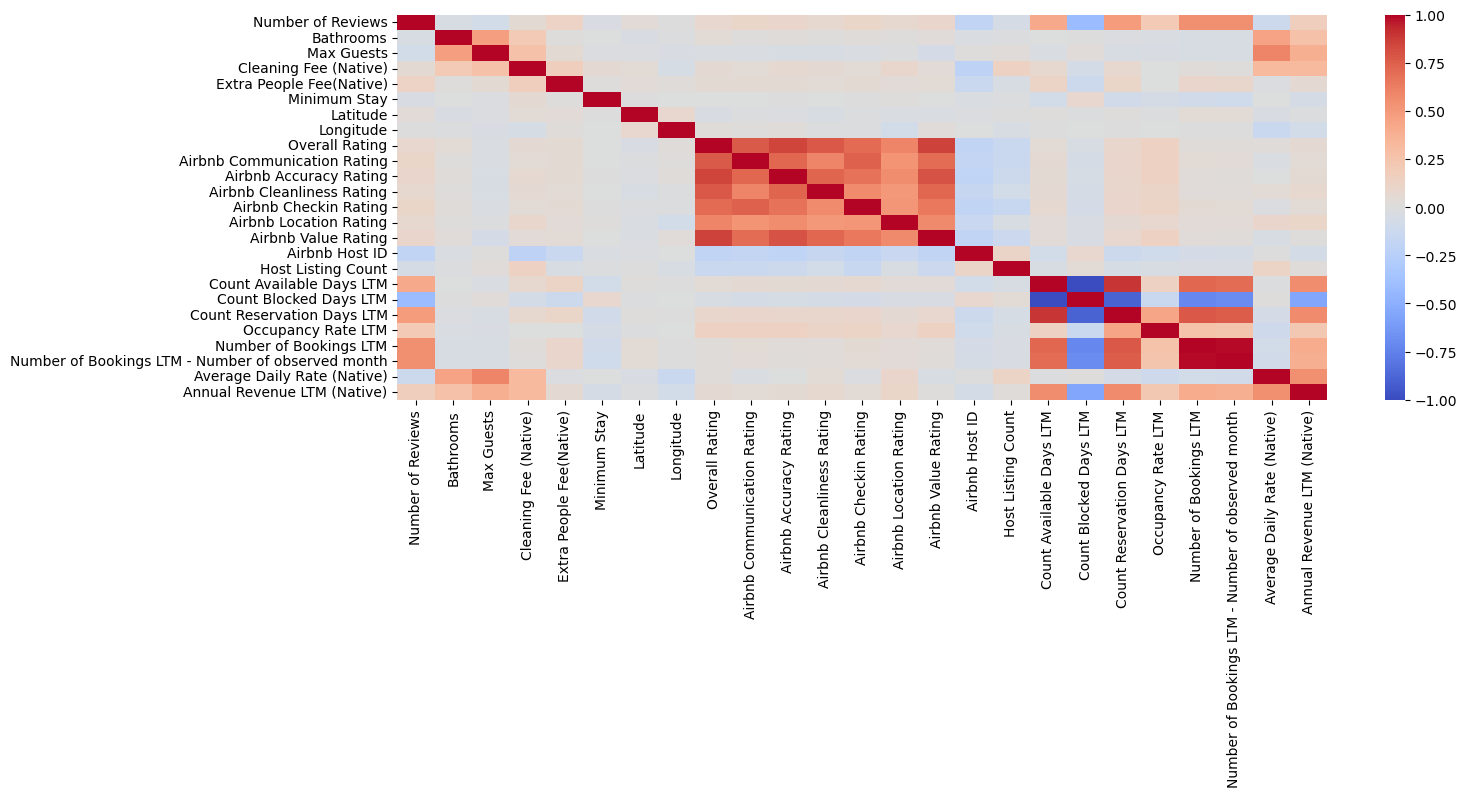

In [57]:
plt.figure(figsize=(15, 5))
sns.heatmap(num_cols.corr(), cmap="coolwarm", vmax=1.0, vmin=-1.0)
plt.show()

There is a large amount of correlation between various columns. In many ways, this is unsurprising. Many of the columns are directly influence on the outcome of others, such as specific review columns ultimately influencing the property overall review, columns that have reference to property availability are going to have strong correlations, as they portray similar information in different formats. 

These correlations must be tackled in an appropritate manner, as all independent variables must not be correlated between each other, as this can ultimately impact the final model. 

Look at some of the columns that seem to have very strong correlations. These will be investigated further, to determine how best to address the issue.

Starting with 'Number of Bookings LTM - Number of observed month' and 'Number of Bookings LTM'.

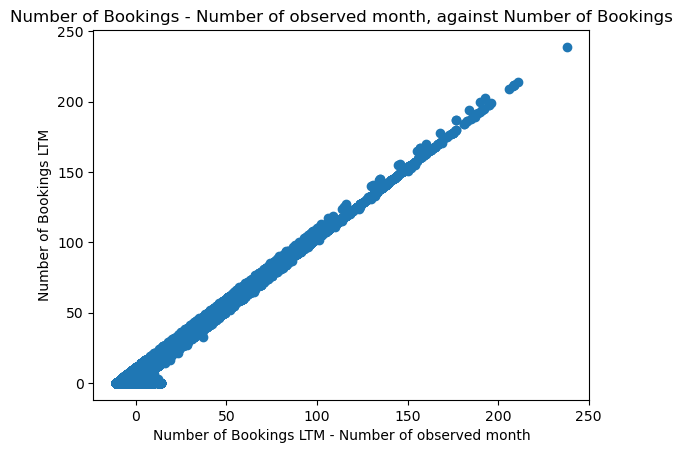

In [61]:
plt.figure()
plt.scatter(airbnb_ldn['Number of Bookings LTM - Number of observed month'], airbnb_ldn['Number of Bookings LTM'])
plt.xlabel('Number of Bookings LTM - Number of observed month')
plt.ylabel('Number of Bookings LTM')
plt.title('Number of Bookings - Number of observed month, against Number of Bookings')
plt.show()

Looking more into the 'Occupancy Rate LTM', it can be seen that a vast proportion of the various properties have a occupancy rate of 100%. This will be investiagated further:

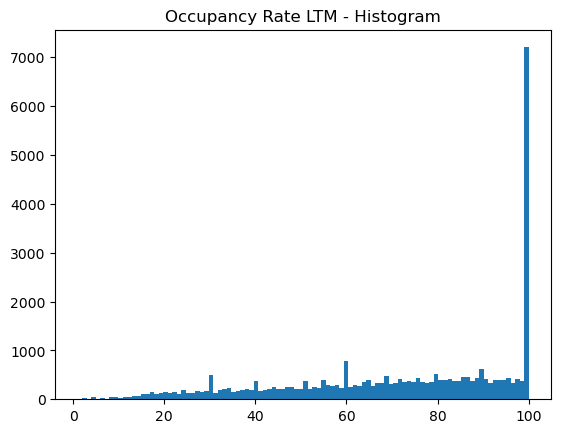

In [71]:
plt.figure()
plt.hist(airbnb_ldn['Occupancy Rate LTM'], bins=100)
plt.title('Occupancy Rate LTM - Histogram')
plt.show()

finding the percentage of properties that have an occupancy rate of 100%:

In [92]:
print(f"The percentage of rows on the dataframe where the yearly occupancy rate is 100% for the last twelve months is {round(len(airbnb_ldn[airbnb_ldn['Occupancy Rate LTM'] == 100])/len(airbnb_ldn)*100, 2)}%.")

The percentage of rows on the dataframe where the yearly occupancy rate is 100% for the last twelve months is 22.03%.


The impact the 'Occupancy Rate LTM' column has on the 'Annual Revenue LTM' will now be determined:

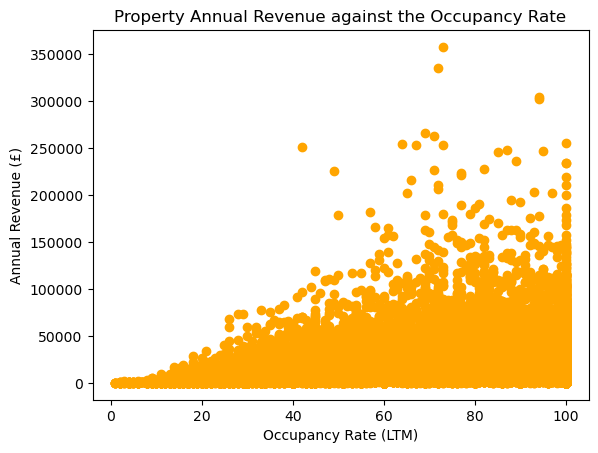

In [97]:
plt.figure()
plt.scatter(airbnb_ldn['Occupancy Rate LTM'], airbnb_ldn['Annual Revenue LTM (Native)'], color = 'orange')
plt.xlabel('Occupancy Rate (LTM)')
plt.ylabel('Annual Revenue (£)')
plt.title('Property Annual Revenue against the Occupancy Rate')
plt.show()

There does seem to be some positive trend between the annual revenue and the occupancy rate, but there are some unexpected results. There seems to be a significant number of properties that have a occupany rate of 100%, but an Annual Revenue of £0. 

This seems odd and unless the properties charge £0 rent, then this shouldn't be possible. This will be explored further.

In [107]:
airbnb_ldn[(airbnb_ldn['Annual Revenue LTM (Native)'] <= 100) & (airbnb_ldn['Occupancy Rate LTM'] >= 90)]

,Listing Title,Property Type,Listing Type,City,Zipcode,Number of Reviews,Bedrooms,Bathrooms,Max Guests,Airbnb Superhost,...,guest_controls,Pets Allowed,Count Available Days LTM,Count Blocked Days LTM,Count Reservation Days LTM,Occupancy Rate LTM,Number of Bookings LTM,Number of Bookings LTM - Number of observed month,Average Daily Rate (Native),Annual Revenue LTM (Native)
543,Welcoming room in friendly Hammersmith near Tube,Private room in bed and breakfast,private_room,Greater London,W6 0,4,1,1,1,f,...,"{""allows_children"": false, ""allows_infants"": f...",False,1,364,1,100,1,-1,49.8,49.8
562,Nice Room in Central London,Private room in rental unit,private_room,Greater London,W6 8,3,1,1,2,f,...,"{""allows_children"": true, ""allows_infants"": tr...",False,1,364,1,100,0,-1,60.0,60.0
1271,Large one bedroom flat in Wandsworth.,Entire apartment,entire_home,Greater London,SW18 2,2,1,1,2,f,...,"{""allows_children"": true, ""allows_infants"": fa...",False,1,364,1,100,0,-10,84.5,84.5
1407,Spacious Double Bedroom in Clapham Park,Private room in condo,private_room,Greater London,SW2 5,45,1,1,2,f,...,"{""allows_children"": true, ""allows_infants"": tr...",True,2,363,2,100,3,-7,37.9,75.8
3432,Zen London Studio Private Space,Entire condo,entire_home,Greater London,SE6 1,1,Studio,1,2,f,...,"{""allows_children"": false, ""allows_infants"": f...",False,1,364,1,100,0,-2,71.9,71.9
6930,Compact En-Suite Studio With Kitchenette In Ca...,Entire serviced apartment,entire_home,Greater London,NW1 8,2,1,1,2,f,...,"{""allows_children"": false, ""allows_infants"": f...",False,1,364,1,100,0,-2,79.0,79.0
7268,Shared room near tube (garden view)(female only),Shared room in rental unit,shared_room,Greater London,NW9 5,3,1,1,1,f,...,"{""allows_children"": true, ""allows_infants"": tr...",False,4,361,3,90,0,0,22.1,79.8
8615,Modern Bright Double Room in King's Cross,Private room in rental unit,private_room,Greater London,N1 0,15,1,1,2,f,...,"{""allows_children"": false, ""allows_infants"": f...",True,4,361,3,90,0,1,27.7,99.5
8937,Green Islington Private Double Room + Garden,Private room in rental unit,private_room,Greater London,N1 3,13,1,2,1,t,...,"{""allows_children"": false, ""allows_infants"": f...",True,0,365,0,100,1,-4,60.8,60.8
9294,Room with panoramic view in Whitechapel,Private room in rental unit,private_room,Greater London,E1 3,3,1,1,1,f,...,"{""allows_children"": false, ""allows_infants"": f...",False,8,357,8,100,0,-2,0.8,6.3
